## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  17.321340  1735.807501  0.067109  5.695818  1.508316
1  93.804834  1398.229739  0.986539  4.401261  1.280700
2  66.916615  1059.778599  0.218293  1.612321  1.472744
3  25.415380  1257.516608  0.652911  5.672034  1.328766
4  59.612160   444.994910  0.005644  9.109012  0.063435


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0296209	total: 69.1ms	remaining: 1m 9s
1:	learn: 1.0200051	total: 69.7ms	remaining: 34.8s
2:	learn: 1.0089091	total: 70.1ms	remaining: 23.3s
3:	learn: 0.9994867	total: 70.6ms	remaining: 17.6s
4:	learn: 0.9886318	total: 71.1ms	remaining: 14.2s
5:	learn: 0.9772477	total: 71.7ms	remaining: 11.9s
6:	learn: 0.9670484	total: 72.2ms	remaining: 10.2s
7:	learn: 0.9558368	total: 72.6ms	remaining: 9.01s
8:	learn: 0.9455288	total: 73.2ms	remaining: 8.06s
9:	learn: 0.9380230	total: 73.7ms	remaining: 7.3s
10:	learn: 0.9280012	total: 74.3ms	remaining: 6.68s
11:	learn: 0.9185228	total: 74.7ms	remaining: 6.15s
12:	learn: 0.9102509	total: 75.2ms	remaining: 5.71s
13:	learn: 0.9012451	total: 75.6ms	remaining: 5.33s
14:	learn: 0.8916953	total: 76.1ms	remaining: 5s
15:	learn: 0.8841407	total: 76.5ms	remaining: 4.71s
16:	learn: 0.8725760	total: 77ms	remaining: 4.45s
17:	learn: 0.8627228	total: 77.4ms	remaining: 4.22s
18:	learn: 0.8547422	total: 77.9ms	remaining: 4.02

89:	learn: 0.4639353	total: 109ms	remaining: 1.1s
90:	learn: 0.4611127	total: 109ms	remaining: 1.09s
91:	learn: 0.4579230	total: 110ms	remaining: 1.09s
92:	learn: 0.4535284	total: 111ms	remaining: 1.08s
93:	learn: 0.4509008	total: 111ms	remaining: 1.07s
94:	learn: 0.4478951	total: 112ms	remaining: 1.06s
95:	learn: 0.4449790	total: 112ms	remaining: 1.05s
96:	learn: 0.4418142	total: 112ms	remaining: 1.04s
97:	learn: 0.4389936	total: 113ms	remaining: 1.04s
98:	learn: 0.4365411	total: 113ms	remaining: 1.03s
99:	learn: 0.4336424	total: 114ms	remaining: 1.02s
100:	learn: 0.4304025	total: 114ms	remaining: 1.02s
101:	learn: 0.4268947	total: 115ms	remaining: 1.01s
102:	learn: 0.4244414	total: 115ms	remaining: 1s
103:	learn: 0.4215269	total: 115ms	remaining: 994ms
104:	learn: 0.4186031	total: 116ms	remaining: 986ms
105:	learn: 0.4157200	total: 116ms	remaining: 979ms
106:	learn: 0.4130592	total: 117ms	remaining: 972ms
107:	learn: 0.4105206	total: 117ms	remaining: 965ms
108:	learn: 0.4081838	total

269:	learn: 0.1889897	total: 187ms	remaining: 505ms
270:	learn: 0.1884533	total: 187ms	remaining: 504ms
271:	learn: 0.1880181	total: 188ms	remaining: 503ms
272:	learn: 0.1872654	total: 188ms	remaining: 501ms
273:	learn: 0.1867055	total: 189ms	remaining: 500ms
274:	learn: 0.1860963	total: 189ms	remaining: 498ms
275:	learn: 0.1857818	total: 189ms	remaining: 497ms
276:	learn: 0.1851428	total: 190ms	remaining: 495ms
277:	learn: 0.1847454	total: 190ms	remaining: 494ms
278:	learn: 0.1841638	total: 191ms	remaining: 493ms
279:	learn: 0.1833811	total: 191ms	remaining: 491ms
280:	learn: 0.1823495	total: 191ms	remaining: 490ms
281:	learn: 0.1815557	total: 192ms	remaining: 488ms
282:	learn: 0.1811455	total: 192ms	remaining: 487ms
283:	learn: 0.1802851	total: 193ms	remaining: 486ms
284:	learn: 0.1794623	total: 193ms	remaining: 485ms
285:	learn: 0.1787366	total: 194ms	remaining: 484ms
286:	learn: 0.1782676	total: 194ms	remaining: 483ms
287:	learn: 0.1776152	total: 195ms	remaining: 481ms
288:	learn: 

509:	learn: 0.1007934	total: 290ms	remaining: 279ms
510:	learn: 0.1002568	total: 291ms	remaining: 278ms
511:	learn: 0.1000970	total: 291ms	remaining: 278ms
512:	learn: 0.0997878	total: 292ms	remaining: 277ms
513:	learn: 0.0994853	total: 292ms	remaining: 276ms
514:	learn: 0.0989642	total: 293ms	remaining: 276ms
515:	learn: 0.0987782	total: 293ms	remaining: 275ms
516:	learn: 0.0985520	total: 294ms	remaining: 274ms
517:	learn: 0.0982832	total: 294ms	remaining: 274ms
518:	learn: 0.0981012	total: 295ms	remaining: 273ms
519:	learn: 0.0978478	total: 295ms	remaining: 273ms
520:	learn: 0.0976711	total: 296ms	remaining: 272ms
521:	learn: 0.0975372	total: 296ms	remaining: 271ms
522:	learn: 0.0972741	total: 297ms	remaining: 271ms
523:	learn: 0.0970863	total: 297ms	remaining: 270ms
524:	learn: 0.0968277	total: 298ms	remaining: 269ms
525:	learn: 0.0965341	total: 298ms	remaining: 269ms
526:	learn: 0.0962460	total: 298ms	remaining: 268ms
527:	learn: 0.0957504	total: 299ms	remaining: 267ms
528:	learn: 

688:	learn: 0.0650183	total: 368ms	remaining: 166ms
689:	learn: 0.0649024	total: 369ms	remaining: 166ms
690:	learn: 0.0647581	total: 369ms	remaining: 165ms
691:	learn: 0.0646516	total: 370ms	remaining: 165ms
692:	learn: 0.0644655	total: 370ms	remaining: 164ms
693:	learn: 0.0642822	total: 370ms	remaining: 163ms
694:	learn: 0.0641783	total: 371ms	remaining: 163ms
695:	learn: 0.0639982	total: 371ms	remaining: 162ms
696:	learn: 0.0638569	total: 372ms	remaining: 162ms
697:	learn: 0.0637558	total: 372ms	remaining: 161ms
698:	learn: 0.0635791	total: 373ms	remaining: 160ms
699:	learn: 0.0634054	total: 373ms	remaining: 160ms
700:	learn: 0.0633767	total: 373ms	remaining: 159ms
701:	learn: 0.0630588	total: 374ms	remaining: 159ms
702:	learn: 0.0630372	total: 374ms	remaining: 158ms
703:	learn: 0.0629257	total: 375ms	remaining: 158ms
704:	learn: 0.0627559	total: 375ms	remaining: 157ms
705:	learn: 0.0627279	total: 375ms	remaining: 156ms
706:	learn: 0.0625905	total: 376ms	remaining: 156ms
707:	learn: 

922:	learn: 0.0374094	total: 472ms	remaining: 39.4ms
923:	learn: 0.0373261	total: 472ms	remaining: 38.9ms
924:	learn: 0.0372067	total: 473ms	remaining: 38.3ms
925:	learn: 0.0371985	total: 473ms	remaining: 37.8ms
926:	learn: 0.0371903	total: 474ms	remaining: 37.3ms
927:	learn: 0.0371083	total: 474ms	remaining: 36.8ms
928:	learn: 0.0370565	total: 475ms	remaining: 36.3ms
929:	learn: 0.0369123	total: 475ms	remaining: 35.7ms
930:	learn: 0.0368663	total: 475ms	remaining: 35.2ms
931:	learn: 0.0368172	total: 476ms	remaining: 34.7ms
932:	learn: 0.0367008	total: 476ms	remaining: 34.2ms
933:	learn: 0.0365979	total: 476ms	remaining: 33.7ms
934:	learn: 0.0365900	total: 477ms	remaining: 33.1ms
935:	learn: 0.0365452	total: 477ms	remaining: 32.6ms
936:	learn: 0.0364444	total: 477ms	remaining: 32.1ms
937:	learn: 0.0364000	total: 478ms	remaining: 31.6ms
938:	learn: 0.0363922	total: 478ms	remaining: 31.1ms
939:	learn: 0.0363009	total: 479ms	remaining: 30.5ms
940:	learn: 0.0362503	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

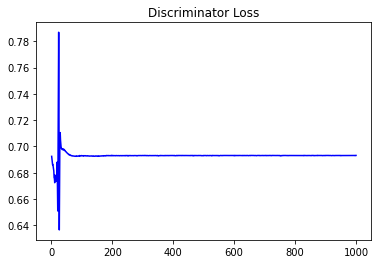

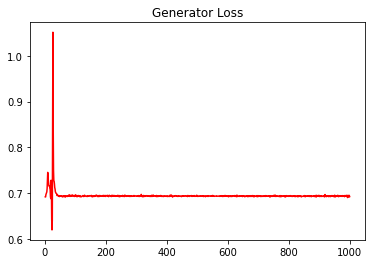

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06823397023622792


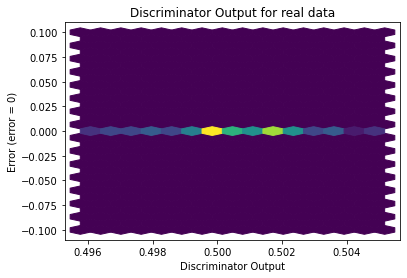

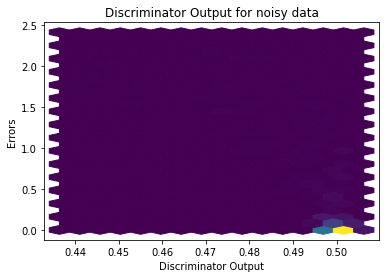

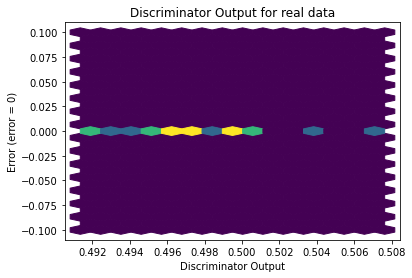

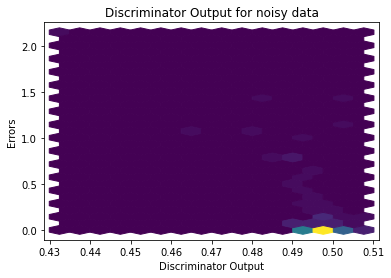

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


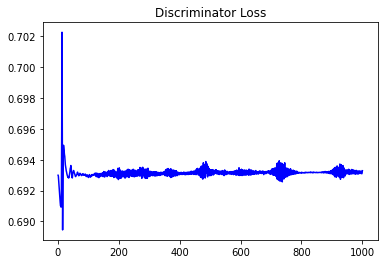

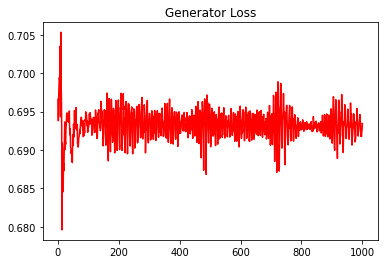

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.06353920655980648


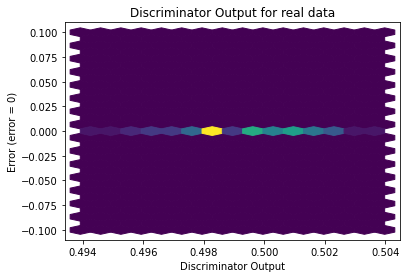

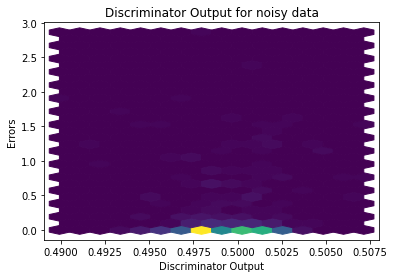

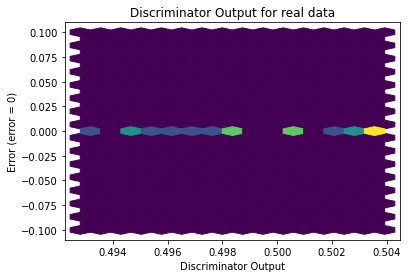

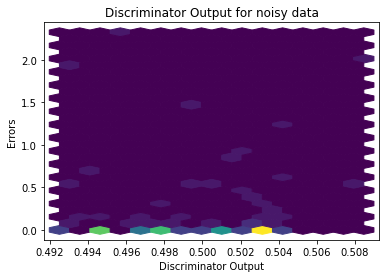

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0622]], requires_grad=True)
